In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Load the dataset
data = pd.read_csv('bitcoin_5_years_data.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [50]:
# Display the first few rows of the dataset
data.head()

,timestamp_unix,open,high,low,close,volume
timestamp,,,,,,
2019-12-23,1.577059e+09,7500.71,7695.38,7265.84,7317.09,68051.997203
2019-12-24,1.577146e+09,7317.30,7436.68,7157.04,7255.77,43629.494188
2019-12-25,1.577232e+09,7255.77,7271.77,7128.86,7204.63,27492.044323
2019-12-26,1.577318e+09,7205.01,7435.00,7157.12,7202.00,36259.761076
2019-12-27,1.577405e+09,7202.00,7275.86,7076.42,7254.74,33642.701861


In [51]:
# Checking for missing values
data.isnull().sum()

timestamp_unix    0
open              0
high              0
low               0
close             0
volume            0
dtype: int64

In [52]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-12-23 to 2024-12-21
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp_unix  1826 non-null   float64
 1   open            1826 non-null   float64
 2   high            1826 non-null   float64
 3   low             1826 non-null   float64
 4   close           1826 non-null   float64
 5   volume          1826 non-null   float64
dtypes: float64(6)
memory usage: 99.9 KB


In [53]:
# Data overview
data.describe()

,timestamp_unix,open,high,low,close,volume
count,1.826000e+03,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,1.655899e+09,35788.403713,36636.196227,34901.136867,35837.707382,84530.700601
std,4.555571e+07,20719.713411,21196.986445,20238.808791,20759.227301,91545.267500
min,1.577059e+09,4800.010000,5365.420000,3782.130000,4800.000000,7308.955420
25%,1.616480e+09,19418.672500,19905.467500,19057.417500,19422.077500,33960.002250
50%,1.655899e+09,31548.080000,32625.170000,30238.085000,31596.690000,52697.306812
75%,1.695319e+09,49899.000000,51373.040000,48339.370000,49916.862500,88037.176046
max,1.734739e+09,106133.740000,108353.000000,105321.490000,106133.740000,760705.362783


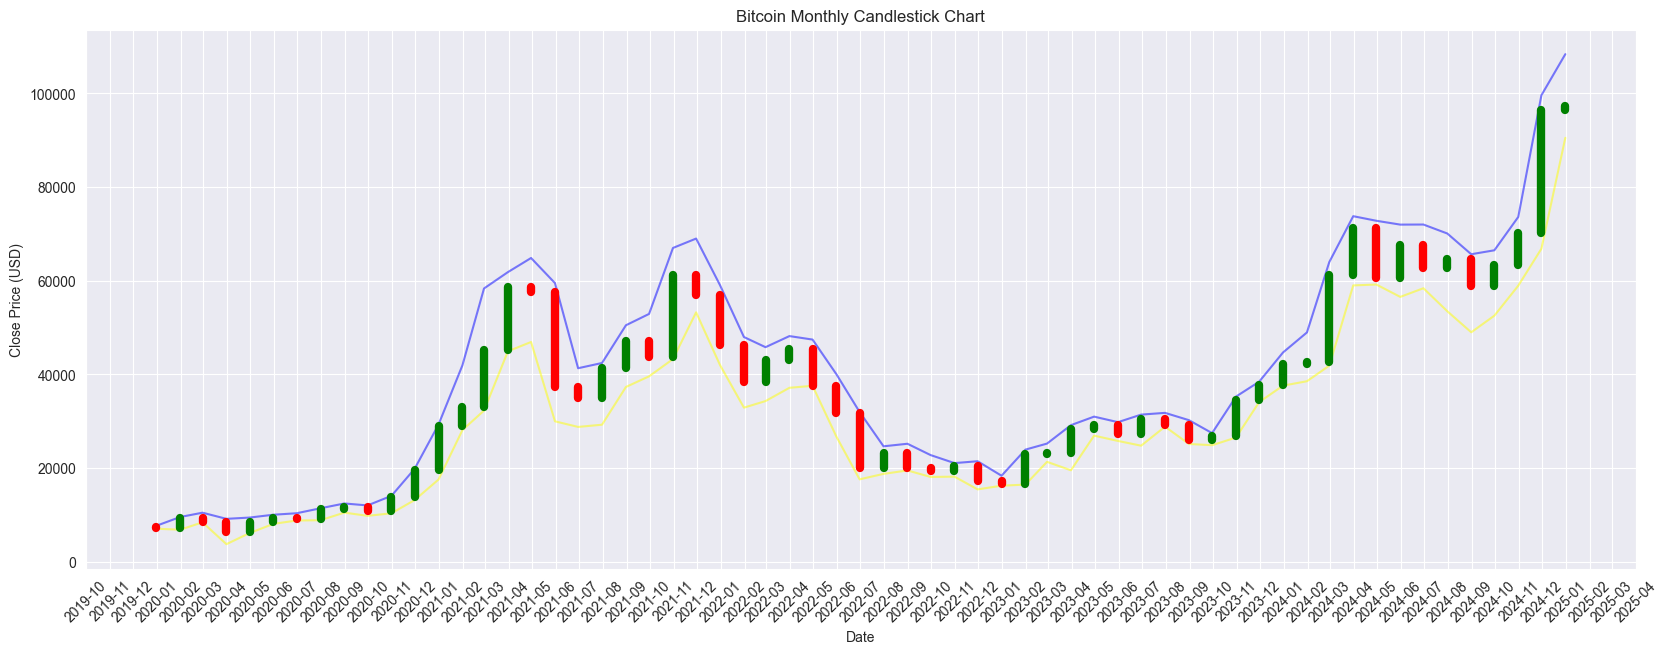

In [54]:
# monthly
btc_data_monthly = data.resample('ME').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).dropna()
# Create a color column and use apply() to optimize the loop
btc_data_monthly['color'] = btc_data_monthly.apply(
    lambda row: 'green' if row['close'] >= row['open'] else 'red', axis=1)
# K line
fig, ax = plt.subplots(figsize=(20, 7))
# Plot monthly data using the vectorized method
ax.plot(btc_data_monthly.index, btc_data_monthly['low'], color='yellow', linestyle='-', alpha=0.5)
ax.plot(btc_data_monthly.index, btc_data_monthly['high'], color='blue', linestyle='-', alpha=0.5)
# Draws the rectangular portion of the close and open prices
for i, row in btc_data_monthly.iterrows():
    ax.plot([i, i], [row['open'], row['close']], linewidth=6, color=row['color'])
# Set date format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# 
plt.xticks(rotation=45)
plt.xlabel('Date') 
plt.ylabel('Close Price (USD)')
plt.title('Bitcoin Monthly Candlestick Chart')
plt.grid(True)
plt.show()

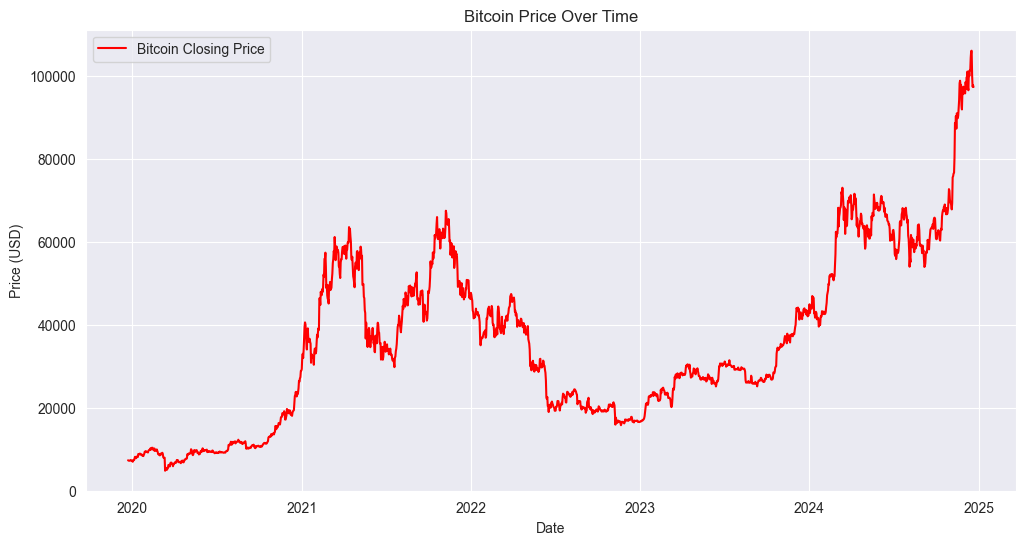

In [55]:
# Historical price trend
plt.figure(figsize=(12,6))

plt.plot(data['close'],color='red', label='Bitcoin Closing Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.legend()
plt.grid(True)
plt.show()

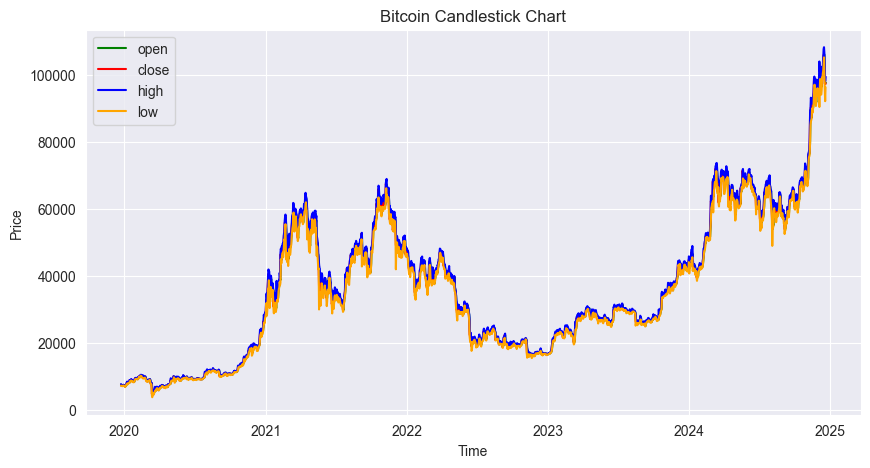

In [56]:
# Candlestick Chart
plt.figure(figsize=(10, 5))

plt.plot(data.index, data['open'], color='green', label='open')
plt.plot(data.index, data['close'], color='red', label='close')
plt.plot(data.index, data['high'], color='blue', label='high')
plt.plot(data.index, data['low'], color='orange', label='low')

plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.grid(True)
plt.show()

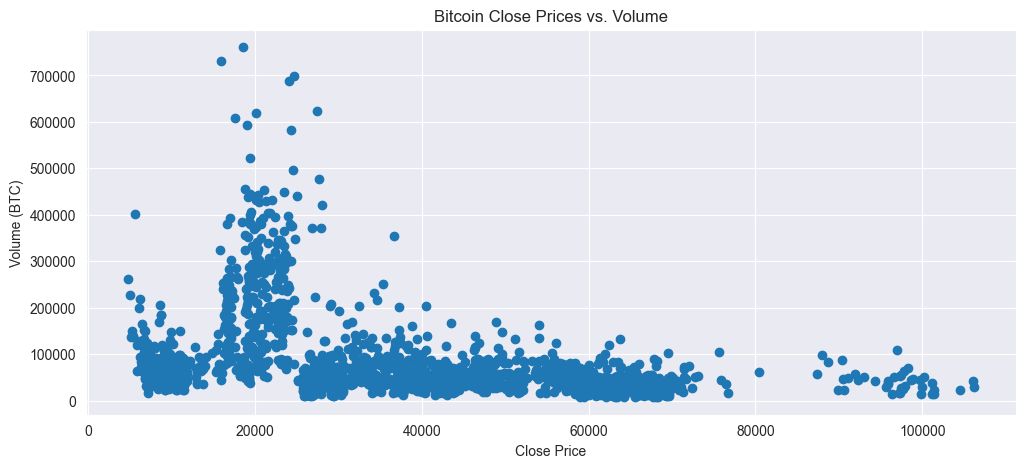

In [57]:
# Bitcoin close prices and volume
plt.figure(figsize=(12, 5))
plt.scatter(data['close'], data['volume'])
plt.title('Bitcoin Close Prices vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

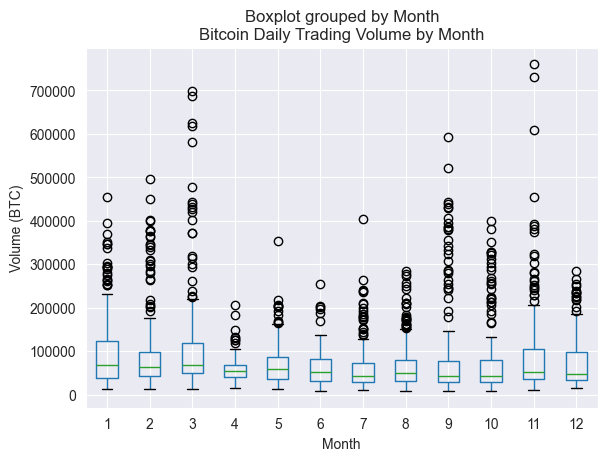

In [58]:
# Bitcoin daily trading volume by month
data['Month'] = data.index.month
plt.figure(figsize=(10, 5))
data.boxplot(column='volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

correlation matrix：
            open     close      high       low    volume
open    1.000000  0.997996  0.999037  0.998490 -0.326094
close   0.997996  1.000000  0.999145  0.998894 -0.327050
high    0.999037  0.999145  1.000000  0.998151 -0.319885
low     0.998490  0.998894  0.998151  1.000000 -0.335267
volume -0.326094 -0.327050 -0.319885 -0.335267  1.000000


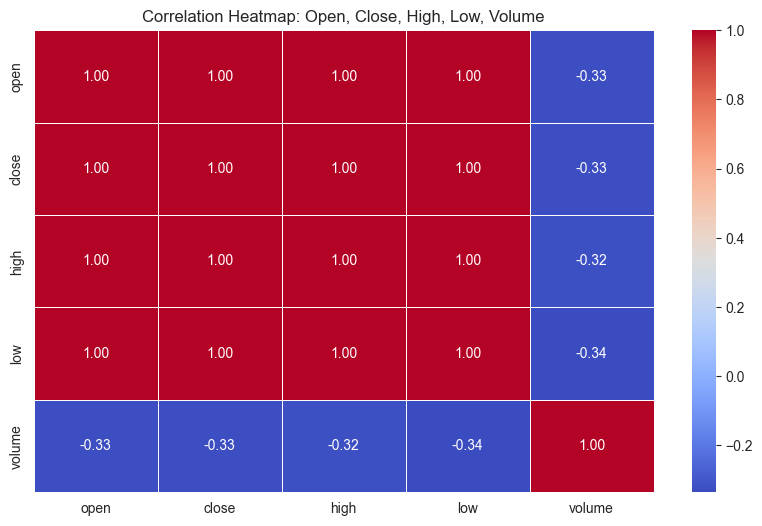

In [59]:
# Correlation matrix
correlation = data[['open', 'close', 'high', 'low', 'volume']].corr()

print("correlation matrix：")
print(correlation)

# Visual correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Open, Close, High, Low, Volume')
plt.show()

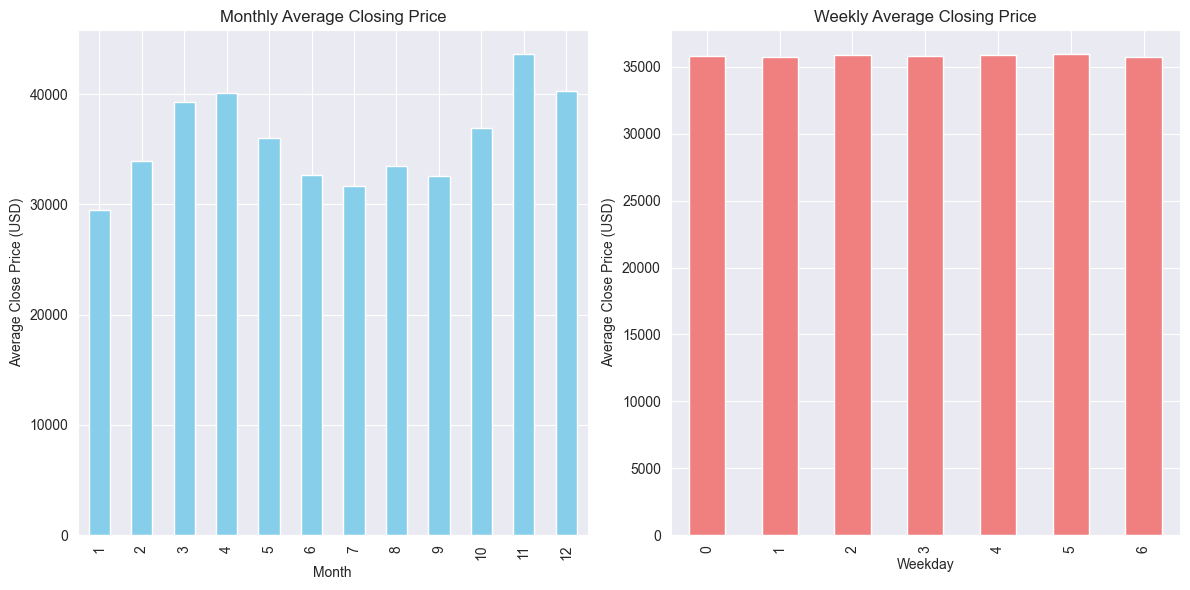

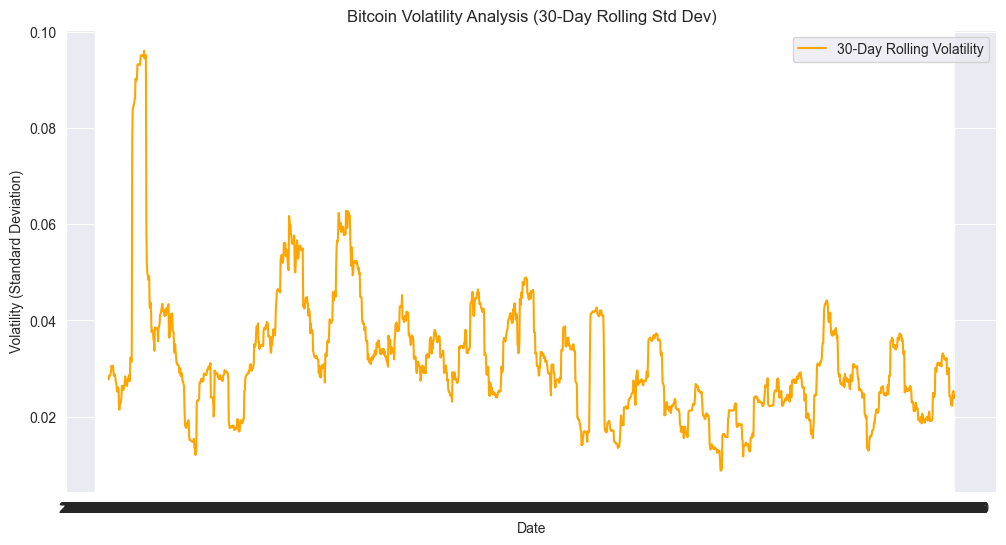

In [61]:
data = pd.read_csv('bitcoin_5_years_data.csv')
# Monthly and weekly price fluctuations (average)
data['Month'] = data['timestamp'].apply(lambda x: pd.to_datetime(x).month)
data['Weekday'] = data['timestamp'].apply(lambda x: pd.to_datetime(x).weekday())

# Monthly average price
monthly_avg = data.groupby('Month')['close'].mean()

# Weekly average price
weekly_avg = data.groupby('Weekday')['close'].mean()

# Visualize monthly and weekly trends
plt.figure(figsize=(12, 6))

# Monthly trend chart
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price (USD)')

# Weekly trend chart
plt.subplot(1, 2, 2)
weekly_avg.plot(kind='bar', color='lightcoral')
plt.title('Weekly Average Closing Price')
plt.xlabel('Weekday')
plt.ylabel('Average Close Price (USD)')

plt.tight_layout()
plt.show()

# Volatility analysis
# Returns -- Percentage change in price
data['Returns'] = data['close'].pct_change()  
# 30-day rolling standard deviation as volatility
volatility = data['Returns'].rolling(window=30).std()  

# Visual volatility
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], volatility, label='30-Day Rolling Volatility', color='orange')
plt.title('Bitcoin Volatility Analysis (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

                close        rsi
timestamp                       
2024-12-17  106133.74  70.691812
2024-12-18  100204.01  52.882558
2024-12-19   97461.86  50.885682
2024-12-20   97805.44  46.374496
2024-12-21   97381.32  45.465825


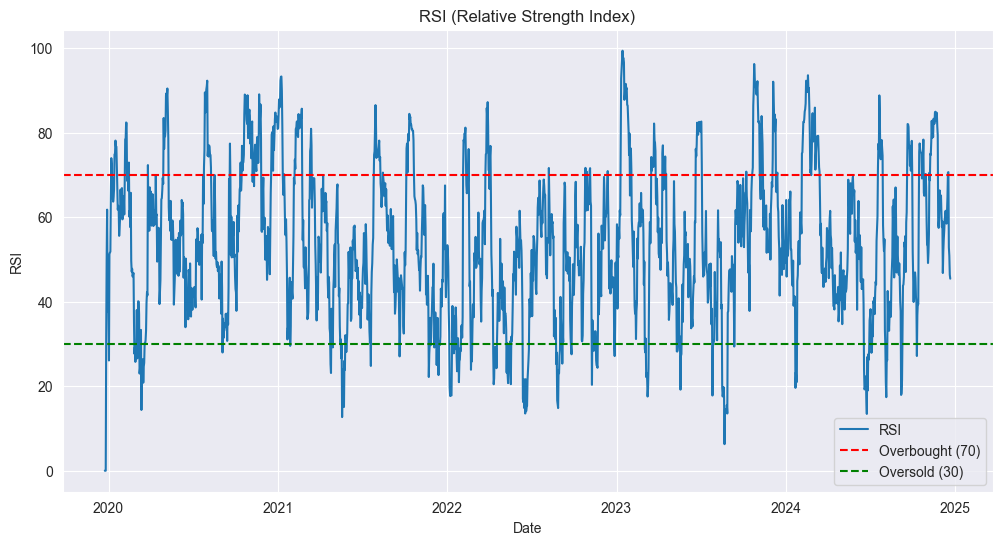

In [44]:
# Daily price changes
data['price_change'] = data['close'].diff()

# Positive and negative daily changes
data['gain'] = data['price_change'].apply(lambda x: x if x > 0 else 0)
data['loss'] = data['price_change'].apply(lambda x: -x if x < 0 else 0)

# Average rise and average fall ( 14-day)
n = 14 
data['avg_gain'] = data['gain'].rolling(window=n, min_periods=1).mean()
data['avg_loss'] = data['loss'].rolling(window=n, min_periods=1).mean()

# Calculated relative strength（RS）
data['rs'] = data['avg_gain'] / data['avg_loss']

# RSI
data['rsi'] = 100 - (100 / (1 + data['rs']))

# RSI , last few rows of data
print(data[['close', 'rsi']].tail())

plt.figure(figsize=(12,6))
plt.plot(data.index, data['rsi'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

          close  middle_band     upper_band    lower_band
1821  106133.74   99455.1115  106041.928567  92868.294433
1822  100204.01   99683.1130  106025.629312  93340.596688
1823   97461.86   99683.2060  106025.585113  93340.826887
1824   97805.44   99753.0785  105973.143533  93533.013467
1825   97381.32   99762.8855  105966.499981  93559.271019


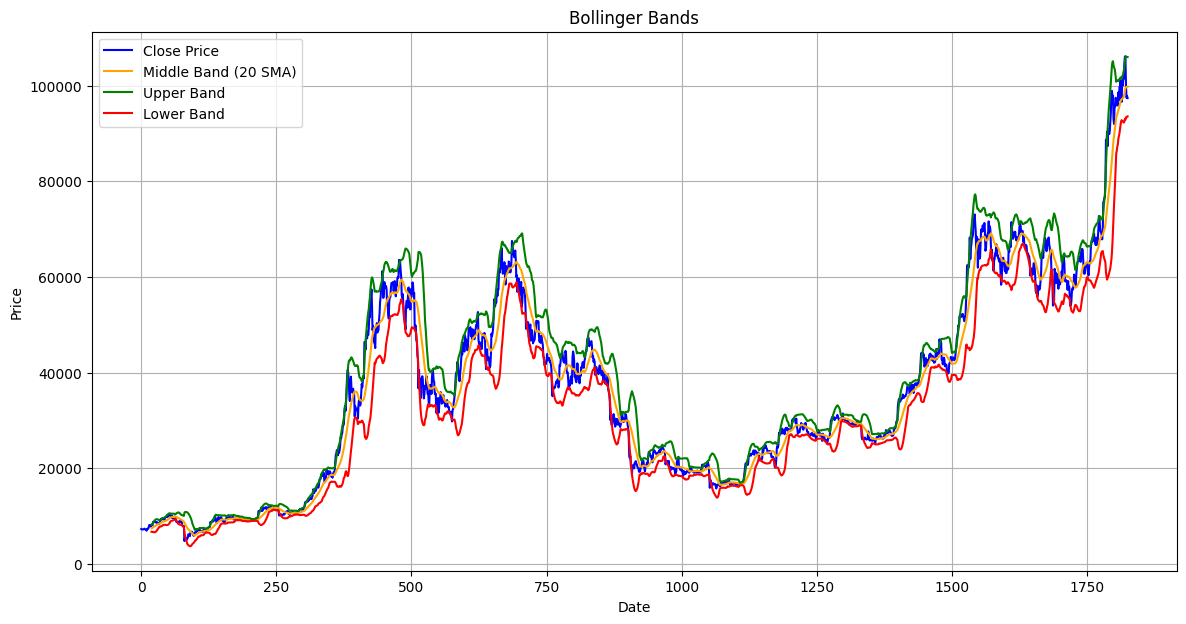

In [197]:
# The period of the moving average, usually 20 days
window = 20
# Multiple of standard deviation, usually 2
std_dev = 2

# Median (20-day Simple Moving Average)
data['middle_band'] = data['close'].rolling(window=window).mean()

# std
data['std_dev'] = data['close'].rolling(window=window).std()

# up low
data['upper_band'] = data['middle_band'] + (std_dev * data['std_dev'])
data['lower_band'] = data['middle_band'] - (std_dev * data['std_dev'])

print(data[['close', 'middle_band', 'upper_band', 'lower_band']].tail())

plt.figure(figsize=(14, 7))
# Plot closing price
plt.plot(data.index, data['close'], label='Close Price', color='blue')
# mid up low
plt.plot(data.index, data['middle_band'], label='Middle Band (20 SMA)', color='orange')
plt.plot(data.index, data['upper_band'], label='Upper Band', color='green')
plt.plot(data.index, data['lower_band'], label='Lower Band', color='red')

#
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [14]:
# LSTM model
# Normalized data, LSTM model is more sensitive to normalized data
scaler = MinMaxScaler(feature_range=(0, 1))
data['close'] = scaler.fit_transform(data[['close']])

# 80% for training and 20% for testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Convert data to a format suitable for LSTM
time_step = 30
train_data = train_data['close'].values
test_data = test_data['close'].values

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

# Create a function to build a time series data set
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Adjust the input shape to fit the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam

# Use the Input layer to explicitly specify the input shape
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1))) 
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compilation Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# training model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0275 - val_loss: 0.0078
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.1309e-04 - val_loss: 0.0021
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.3116e-04 - val_loss: 0.0031
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.6451e-04 - val_loss: 0.0021
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7786e-04 - val_loss: 0.0020
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.4265e-04 - val_loss: 0.0014
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.5234e-04 - val_loss: 0.0016
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.2451e-04 - val_loss: 0.0014
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.7113e-04 - val_loss: 0.0017


In [12]:
from sklearn.metrics import mean_squared_error

# predict the outcome
y_pred = model.predict(X_test)

# Reverse normalize the predicted value
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the mean square error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error: 0.0010620290990213618


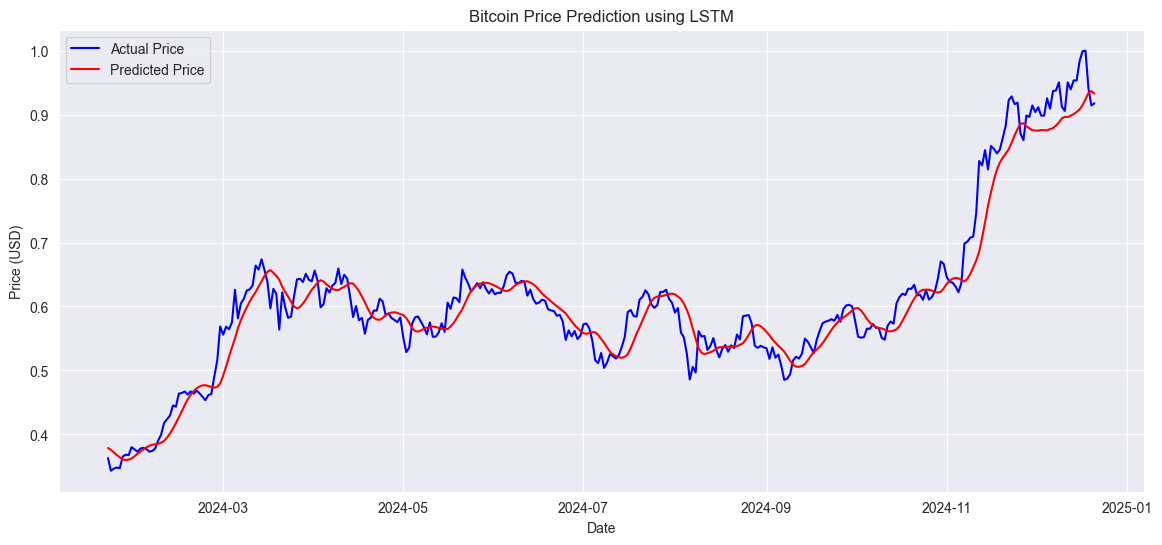

In [13]:
# Visual result
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(data['timestamp'][-len(y_pred):], y_pred, color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()